In [1]:
import pandas as pd
import re
import os
df = pd.read_feather("data/included_studies.feather")
df.head()

,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,4 - 2.04. Extreme event attribution,4 - 2.05. Scenarios,5 - 4.01. Floods and drought,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity
0,W2021823358,Projections of heat waves with high impact on ...,"Climate change will result in more intense, mo...",2014.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,W2345489509,Climate Change and the Emergent Epidemic of CK...,Climate change has led to significant rise of ...,2016.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W2093213412,Children are likely to suffer most from our fo...,BACKGROUND: The periods of fetal and child dev...,2008.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,W615562828,Autochthonous Chikungunya Transmission and Ext...,Background Extreme precipitation events are in...,2015.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
grid_df = pd.read_csv('data/grid_df.csv')
grid_df

,index,LAT,LON,area,is_land,precip_da,temp_da,population
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
10363,10363,88.75,168.75,1685.654015,False,NaN,NaN,0.0
10364,10364,88.75,171.25,1685.654015,False,NaN,NaN,0.0
10365,10365,88.75,173.75,1685.654015,False,NaN,NaN,0.0
10366,10366,88.75,176.25,1685.654015,False,NaN,NaN,0.0


In [3]:
# Now we load our index of studies to grid cells, and generate a column which for each document-place combo is
# 1 / the number of grid cells it appears in 
shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(grid_df[["index","area","population"]], left_on="grid_df_id", right_on="index")
shp_df_matches["doc_share"] = shp_df_matches.groupby("doc_id")["area"].transform(
    lambda x: x / x.sum()
)
shp_df_matches["doc_share_km10000"] = shp_df_matches["doc_share"] / (shp_df_matches["area"]/10000)
shp_df_matches["doc_share_pp"] = shp_df_matches["doc_share"] / (shp_df_matches["population"]/1e6)
shp_df_matches

/tmp/ipykernel_294946/3620890671.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(grid_df[["index","area","population"]], left_on="grid_df_id", right_on="index")


,grid_df_id,doc_id,shp_id,place,index,area,population,doc_share,doc_share_km10000,doc_share_pp
0,6281,5249722,1710.0,'asir region,6281,73170.065846,3306124.80,0.503971,0.068877,0.152436
1,6281,5110789,1710.0,'asir region,6281,73170.065846,3306124.80,0.532462,0.072770,0.161053
2,6281,3927578,1710.0,'asir region,6281,73170.065846,3306124.80,0.035873,0.004903,0.010851
3,6281,3313720,1710.0,'asir region,6281,73170.065846,3306124.80,0.035873,0.004903,0.010851
4,6281,W2291458255,1710.0,'asir region,6281,73170.065846,3306124.80,0.035873,0.004903,0.010851
...,...,...,...,...,...,...,...,...,...,...
5136413,5592,W2793754639,NaN,eseo bank,5592,76811.546551,732694.06,0.009107,0.001186,0.012430
5136414,9278,4216519,NaN,segelsällskapets fjord,9278,24837.890473,0.00,0.014207,0.005720,inf
5136415,5734,1680424,NaN,mischief reef,5734,76371.502551,14917.69,0.023455,0.003071,1.572326
5136416,5734,W3023373585,NaN,mischief reef,5734,76371.502551,14917.69,0.023455,0.003071,1.572326


In [4]:
# Here we define a function that takes a dataframe and returns a grid cell dataframe with the weighted 
# number of studies from that dataframe in each cell
def sum_studies(df, shp_df_matches, grid_df, name):
    sums = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_share_km10000"].sum()
    ).to_frame(name).reset_index().rename(columns={"grid_df_id": "index"})
    pc_sums = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_share_pp"].sum()
    ).to_frame(f"{name}_pp").reset_index().rename(columns={"grid_df_id": "index"})
    counts = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_id"].nunique()
    ).to_frame(f"{name}_count").reset_index().rename(columns={"grid_df_id": "index"})

    return grid_df.merge(sums, how="outer").merge(counts, how="outer").merge(pc_sums, how="outer")

study_grid_df = sum_studies(df, shp_df_matches, grid_df, "all_studies")
study_grid_df.head()

,index,LAT,LON,area,is_land,precip_da,temp_da,population,all_studies,all_studies_count,all_studies_pp
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
# study_grid_df = sum_studies(
#     df[df["19 - Precipitation - prediction_mean"]>=0.5], shp_df_matches, study_grid_df, "precip_studies"
# )
# study_grid_df = sum_studies(
#     df[df["19 - Temperature - prediction_mean"]>=0.5], shp_df_matches, study_grid_df, "temp_studies"
# )

# impact_cols = [x for x in df.columns if re.match("^12 -", x) and "mean" in x]
# impact_labels = []
# for c in impact_cols:
#     clabel = f"{c.split(' - ')[1]}_studies"
#     study_grid_df = sum_studies(
#         df[df[c]>=0.5], shp_df_matches, study_grid_df, clabel
#     )
#     impact_labels.append(clabel)
    
# study_grid_df.head()

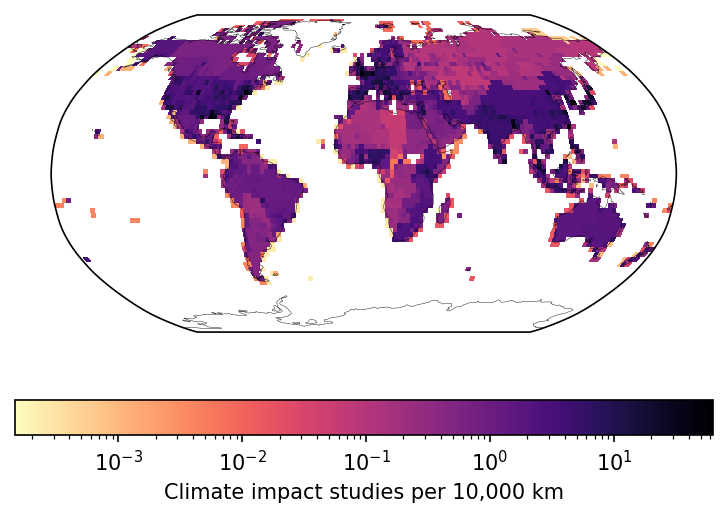

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
from matplotlib import colormaps

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

study_grid_df["land_studies"] = study_grid_df["all_studies"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=colormaps['magma_r'],
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)





cbar = plt.colorbar(mesh, orientation="horizontal")
cbar.set_label("Climate impact studies per 10,000 km")


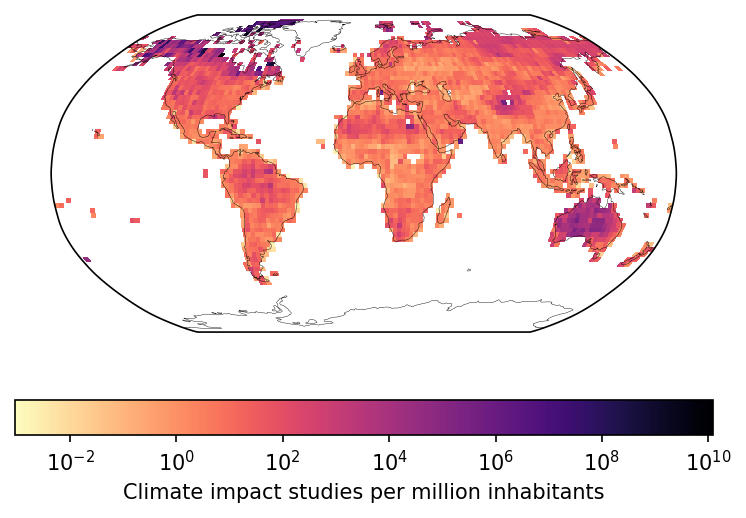

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
from matplotlib import colormaps

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

study_grid_df["land_studies"] = study_grid_df["all_studies_pp"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=colormaps['magma_r'],
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)



cbar = plt.colorbar(mesh, orientation="horizontal")
cbar.set_label("Climate impact studies per million inhabitants")


In [8]:
for orig_var in ["temp_da", "precip_da"]:
    simp_var = f"{orig_var}_simplified"
    grid_df[simp_var] = grid_df[orig_var]
    grid_df.loc[grid_df[orig_var].isin([2,3]), simp_var] = 1
    grid_df.loc[grid_df[orig_var].isin([-2,-3]), simp_var] = -1
    grid_df.loc[grid_df[orig_var].isin([-4, 4]), simp_var] = 0
grid_df.head()

,index,LAT,LON,area,is_land,precip_da,temp_da,population,temp_da_simplified,precip_da_simplified
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN


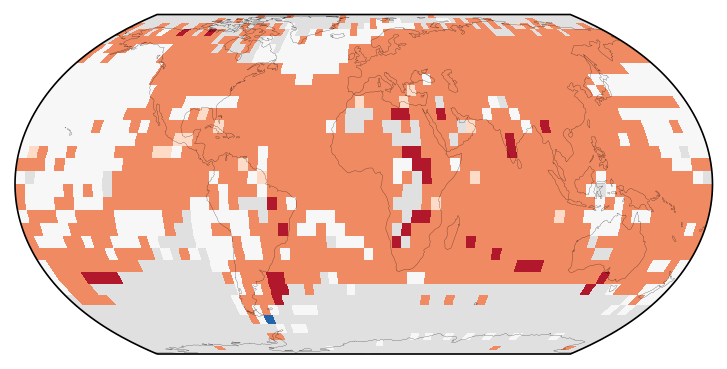

In [9]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

def plot_da(df, ax, da_var, colors=['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"], vmin=-4, vmax=4):
    
    ax.coastlines(lw=0.1)

    bn = np.zeros((len(df.LAT.unique()), len(df.LON.unique())))
    bn+=1
    mesh = ax.pcolormesh(
        df.LON.unique(),#-degrees*0.5,
        df.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    mesh = ax.pcolormesh(
        df.LON.unique(),
        df.LAT.unique(),
        n,
        cmap=mpl.colors.ListedColormap(colors),
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree(),
    )
    
    return mesh

precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
    
plot_da(grid_df, ax, 'temp_da', precip_colors[::-1])

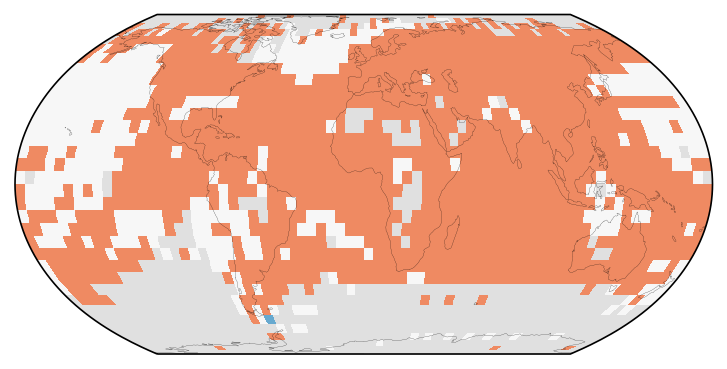

In [10]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

s_precip_colors = ['#ef8a62','#f7f7f7','#67a9cf']
plot_da(grid_df, ax, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

(0.0, 1.0)


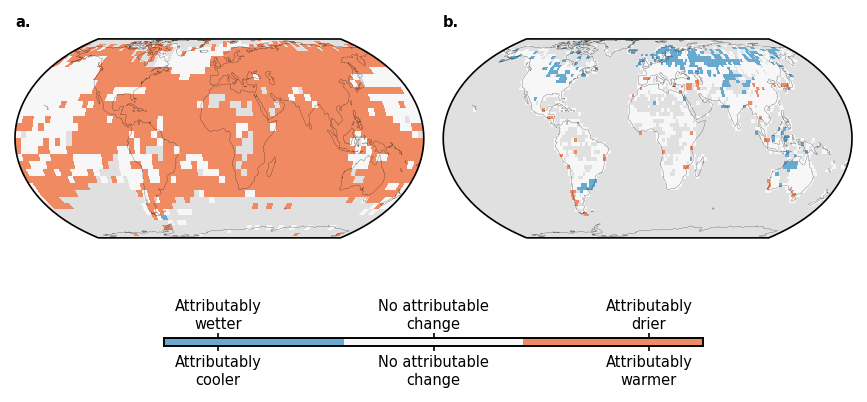

In [11]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,3), dpi=150, constrained_layout=False)
w_r = [1,2,2,1]

h_r = [1.25,0.1]
gs = fig.add_gridspec(2, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(grid_df, axb, 'precip_da_simplified', s_precip_colors, -1, 1)

## Cbar
cax = plt.subplot(gs[1,1:3])

def s_double_cbar(mesh, cax, frac):
    cax.axis('off')

    cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

    #cax.axis('off')
    cax2 = cax.twiny()
    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
        ticks=np.linspace(-.8,.8,3),
    )
    cax.set_xticklabels(["Attributably\ncooler", "No attributable\nchange", "Attributably\nwarmer"])


    
    
    cax2.set_xlim(-1,1)
    cax2.set_xticks(np.linspace(-.8,.8,3))
    cax2.set_xticklabels(["Attributably\nwetter", "No attributable\nchange", "Attributably\ndrier"], fontsize=7)
    cax2.xaxis.set_tick_params(pad=1,length=2.5)
    cax.xaxis.set_tick_params(pad=1.5,length=2.5)
#     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
#     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

    cbar.ax.tick_params(labelsize=7)

    print(cax.get_ylim())
    
s_double_cbar(mesh, cax, 0.4)

/tmp/ipykernel_294946/1266371787.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('magma_r'),


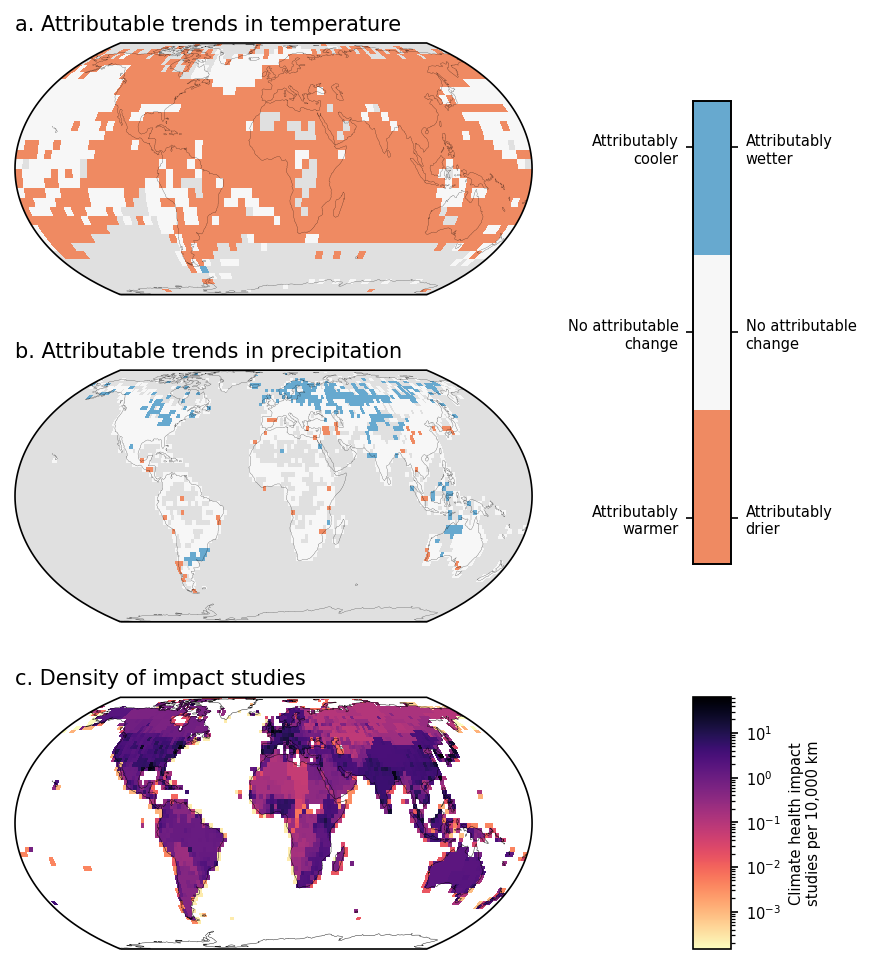

In [20]:
import itertools
from matplotlib.patches import Rectangle, Patch
import cartopy.feature as cfeature

title_fs = 10

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,8), dpi=150, constrained_layout=False)
w_r = [1,.05]

h_r = [1,1,1]
gs = fig.add_gridspec(3, 2, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.3)

############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
axa.set_title('a. Attributable trends in temperature', fontsize=title_fs, loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precip

axa = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
axa.set_title('b. Attributable trends in precipitation', fontsize=title_fs, loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'precip_da_simplified', s_precip_colors, -1, 1)

frac = 0.8
cax = plt.subplot(gs[:2, 1])
cax.axis('off')

cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

#cax.axis('off')

cbar = plt.colorbar(
    mesh, cax=cax, 
    ticks=np.linspace(-.8,.8,3),
)
cax.set_yticklabels(["Attributably\nwarmer", "No attributable\nchange", "Attributably\ncooler"], fontsize=7)

cax2 = cax.twinx()


cax2.set_ylim(-1,1)
cax2.set_yticks(np.linspace(-.8,.8,3))
cax2.set_yticklabels(["Attributably\ndrier", "No attributable\nchange", "Attributably\nwetter"], fontsize=7)
# cax2.xaxis.set_tick_params(pad=1,length=2.5)
# cax.xaxis.set_tick_params(pad=1.5,length=2.5)
# #     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
# #     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

# cbar.ax.tick_params(labelsize=7)


## Plot study density

ax = plt.subplot(gs[2,0],projection=ccrs.EqualEarth())
ax.set_title('c. Density of impact studies', fontsize=title_fs, loc="left" )
ax.coastlines(lw=0.2)
#ax.add_feature(cfeature.BORDERS, ls="--", color="grey", lw=0.5)

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

study_grid_df["land_studies"] = study_grid_df["all_studies"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN
n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('magma_r'),
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree()
)

cax = plt.subplot(gs[2,1])

cbar = plt.colorbar(mesh, orientation="vertical", cax=cax)
cax.tick_params(labelsize=7)
cbar.set_label("Climate health impact\nstudies per 10,000 km", fontsize=7)



In [ ]:
# per who area: number of people living in human-attributable areas vs number of studies on each health impacts